In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt

# Cleaning Stage

In [10]:
country = 'Brazil'
y_name = 'TotProd'

In [29]:
df = pd.read_csv(f'csv_input/{country}_{y_name}.csv')
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,Year,Element
0,1990,27286
1,1991,27293
2,1992,34603
3,1993,28167
4,1994,28192


In [30]:
df.shape

(30, 2)

In [31]:
data = df

In [32]:
data.head()

,Year,Element
0,1990,27286
1,1991,27293
2,1992,34603
3,1993,28167
4,1994,28192


In [33]:
# Create Stationary dataframe
# Calculate difference in the element year over year
def get_diff(data):
    data['element_diff'] = data.Element.diff()    
    data = data.dropna()      
    return data


In [34]:
stationary_df = get_diff(data)
stationary_df.head()

,Year,Element,element_diff
1,1991,27293,7.0
2,1992,34603,7310.0
3,1993,28167,-6436.0
4,1994,28192,25.0
5,1995,18060,-10132.0


In [35]:
def time_plot(data, x_col, y_col, title):
    fig, ax = plt.subplots(figsize=(15,5))
    sns.lineplot(x_col, y_col, data=data, ax=ax, color='mediumblue', label=(f'Total {y_name}'))
     
    ax.set(xlabel = "Year",
           ylabel = y_name,
           title = title)
    
    sns.despine()
    plt.savefig(f'model_output/{country}_{y_name}_{title}.png')

d:\bootcamp\bootcamp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


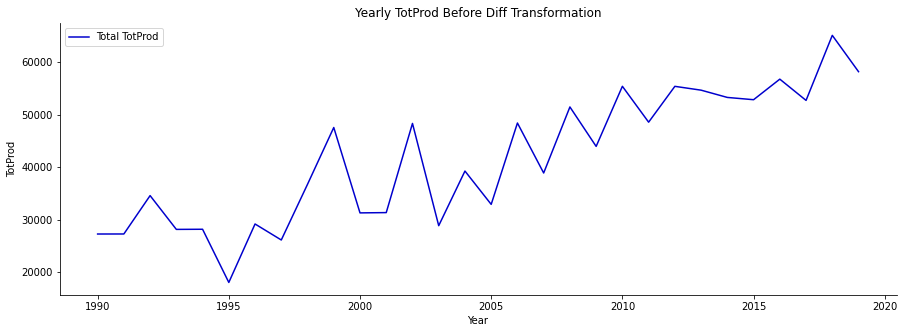

In [36]:
time_plot(data, 'Year', 'Element', (f'Yearly {y_name} Before Diff Transformation'))

d:\bootcamp\bootcamp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


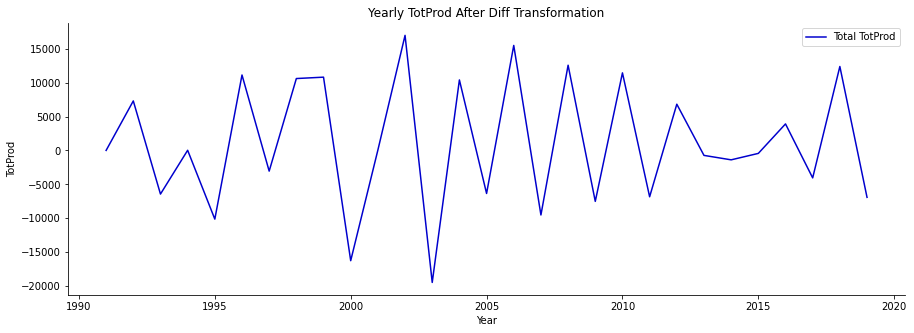

In [37]:
time_plot(stationary_df, 'Year', 'element_diff', (f'Yearly {y_name} After Diff Transformation'))

# Observing Lags

d:\bootcamp\bootcamp\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


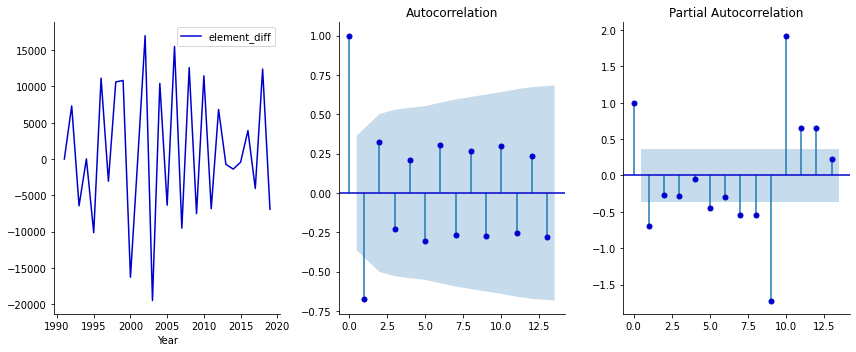

In [38]:
def plots(data, lags=None):
    
    # Convert dataframe to datetime index
    dt_data = data.set_index('Year').drop('Element', axis=1)
    dt_data.dropna(axis=0)
    
    layout = (1, 3)
    raw  = plt.subplot2grid(layout, (0, 0))
    acf  = plt.subplot2grid(layout, (0, 1))
    pacf = plt.subplot2grid(layout, (0, 2))
    
    dt_data.plot(ax=raw, figsize=(12, 5), color='mediumblue')
    smt.graphics.plot_acf(dt_data, lags=lags, ax=acf, color='mediumblue')
    smt.graphics.plot_pacf(dt_data, lags=lags, ax=pacf, color='mediumblue')
    sns.despine()
    plt.tight_layout()

plots(stationary_df, lags=13);
plt.savefig(f'model_output/{country}_{y_name}_3plots.png')

# Preparing Dataset Modeling

## Regresive Modeling

In [39]:
#create dataframe for transformation from time series to supervised
def generate_supervised(data):
    supervised_df = data.copy()
    
    #create column for each lag
    for i in range(1,13):
        col_name = 'lag_' + str(i)
        supervised_df[col_name] = supervised_df['element_diff'].shift(i)
    
    #drop null values
    supervised_df = supervised_df.dropna().reset_index(drop=True)
    
    supervised_df.to_csv(f'csv_output/{country}_{y_name}_model_df.csv', index=False)
    
    return supervised_df


In [40]:
model_df = generate_supervised(stationary_df)

In [41]:
model_df

,Year,Element,element_diff,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
0,2003,28873,-19479.0,16987.0,55.0,-16268.0,10817.0,10613.0,-3049.0,11137.0,-10132.0,25.0,-6436.0,7310.0,7.0
1,2004,39281,10408.0,-19479.0,16987.0,55.0,-16268.0,10817.0,10613.0,-3049.0,11137.0,-10132.0,25.0,-6436.0,7310.0
2,2005,32933,-6348.0,10408.0,-19479.0,16987.0,55.0,-16268.0,10817.0,10613.0,-3049.0,11137.0,-10132.0,25.0,-6436.0
3,2006,48432,15499.0,-6348.0,10408.0,-19479.0,16987.0,55.0,-16268.0,10817.0,10613.0,-3049.0,11137.0,-10132.0,25.0
4,2007,38911,-9521.0,15499.0,-6348.0,10408.0,-19479.0,16987.0,55.0,-16268.0,10817.0,10613.0,-3049.0,11137.0,-10132.0
5,2008,51491,12580.0,-9521.0,15499.0,-6348.0,10408.0,-19479.0,16987.0,55.0,-16268.0,10817.0,10613.0,-3049.0,11137.0
6,2009,43977,-7514.0,12580.0,-9521.0,15499.0,-6348.0,10408.0,-19479.0,16987.0,55.0,-16268.0,10817.0,10613.0,-3049.0
7,2010,55428,11451.0,-7514.0,12580.0,-9521.0,15499.0,-6348.0,10408.0,-19479.0,16987.0,55.0,-16268.0,10817.0,10613.0
8,2011,48592,-6836.0,11451.0,-7514.0,12580.0,-9521.0,15499.0,-6348.0,10408.0,-19479.0,16987.0,55.0,-16268.0,10817.0
9,2012,55418,6826.0,-6836.0,11451.0,-7514.0,12580.0,-9521.0,15499.0,-6348.0,10408.0,-19479.0,16987.0,55.0,-16268.0
